### 1-1. 벡터 연산으로 그림 그리기

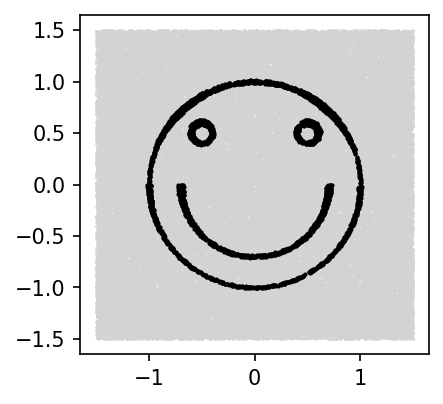

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def circle(P):
    return np.linalg.norm(P) - 1 # 밑의 코드와 동일하게 동작합니다.
    # return np.sqrt(np.sum(P * P)) - 1
    
def diamond(P):
    return np.abs(P[0]) + np.abs(P[1]) - 1
    
def smile(P):
    def left_eye(P):
        eye_pos = P - np.array([-0.5, 0.5])
        return np.sqrt(np.sum(eye_pos * eye_pos)) - 0.1
    
    def right_eye(P):
        eye_pos = P - np.array([0.5, 0.5])
        return np.sqrt(np.sum(eye_pos * eye_pos)) - 0.1
    
    def mouth(P):
        if P[1] < 0:
            return np.sqrt(np.sum(P * P)) - 0.7
        else:
            return 1
    
    return circle(P) * left_eye(P) * right_eye(P) * mouth(P)

def checker(P, shape, tolerance):
    return abs(shape(P)) < tolerance

def sample(num_points, xrange, yrange, shape, tolerance):
    accepted_points = []
    rejected_points = []
    
    for i in range(num_points):
        x = np.random.random() * (xrange[1] - xrange[0]) + xrange[0]
        y = np.random.random() * (yrange[1] - yrange[0]) + yrange[0]
        P = np.array([x, y])
        
        if (checker(P, shape, tolerance)):
            accepted_points.append(P)
        else:
            rejected_points.append(P)
    
    return np.array(accepted_points), np.array(rejected_points)

xrange = [-1.5, 1.5] # X축 범위입니다.
yrange = [-1.5, 1.5] # Y축 범위입니다.
accepted_points, rejected_points = sample(
    100000, #  점의 개수를 줄이거나 늘려서 실행해 보세요. 너무 많이 늘리면 시간이 오래 걸리는 것에 주의합니다.
    xrange, 
    yrange, 
    smile, # smile을 circle 이나 diamond 로 바꿔서 실행해 보세요.
    0.005) # Threshold를 0.01이나 0.0001 같은 다른 값으로 변경해 보세요.

plt.figure(figsize=(xrange[1] - xrange[0], yrange[1] - yrange[0]), 
           dpi=150) # 그림이 제대로 로드되지 않는다면 DPI를 줄여보세요.
           
plt.scatter(rejected_points[:, 0], rejected_points[:, 1], c='lightgray', s=0.1)
plt.scatter(accepted_points[:, 0], accepted_points[:, 1], c='black', s=1)

### 2-1. 기울기와 절편

(0.0, 10.0)

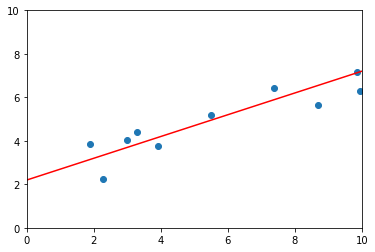

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# 실습에 필요한 데이터입니다. 수정하지마세요. 
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

'''
beta_0과 beta_1 을 변경하면서 그래프에 표시되는 선을 확인해 봅니다.
기울기와 절편의 의미를 이해합니다.
'''

beta_0 = 0.5   # beta_0에 저장된 기울기 값을 조정해보세요. 
beta_1 = 2.2 # beta_1에 저장된 절편 값을 조정해보세요.

plt.scatter(X, Y) # (x, y) 점을 그립니다.
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선을 그립니다.

plt.xlim(0, 10) # 그래프의 X축을 설정합니다.
plt.ylim(0, 10) # 그래프의 Y축을 설정합니다.

### 2-2. Loss Function

Loss: 46.341726


(0.0, 10.0)

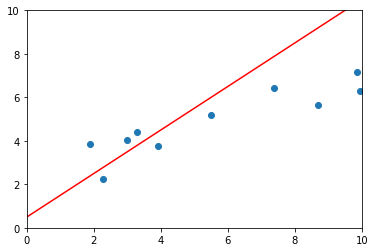

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def loss(x, y, beta_0, beta_1):
    N = len(x)    
    '''    
    x, y, beta_0, beta_1 을 이용해 loss값을 계산한 뒤 리턴합니다.
    '''
    # x = np.array(x)
    # y = np.array(y)
    # np.sum((y - (beta_0 * x + beta_1))**2)
    
    return np.sum((y - (np.array(beta_0 * x) + beta_1))**2)

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

beta_0 = 1 # 기울기
beta_1 = 0.5 # 절편

print("Loss: %f" % loss(X, Y, beta_0, beta_1))

plt.scatter(X, Y) # (x, y) 점을 그립니다.
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선을 그립니다.

plt.xlim(0, 10) # 그래프의 X축을 설정합니다.
plt.ylim(0, 10) # 그래프의 Y축을 설정합니다.

### 2-3. Scikit-learn을 이용한 선형 회귀 분석

beta_0: 0.430781
beta_1: 2.506181
Loss: 3.721640


(0.0, 10.0)

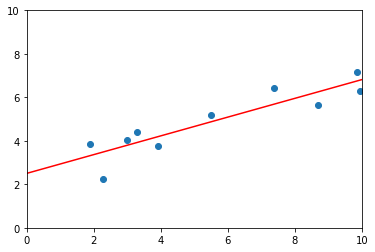

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def loss(x, y, beta_0, beta_1):
    N = len(x)
    
    '''
    이전 실습에서 구현한 loss function을 여기에 붙여넣습니다.
    '''
    x = np.array(x)
    y = np.array(y)
    
    return np.sum((y - (beta_0 * x + beta_1))**2)
    
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

train_X = np.array(X).reshape(-1, 1)
train_Y = np.array(Y)

'''
여기에서 모델을 트레이닝합니다.
'''
lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y)

'''
loss가 최소가 되는 직선의 기울기와 절편을 계산함
'''
beta_0 = lrmodel.coef_[0]   # lrmodel로 구한 직선의 기울기
beta_1 = lrmodel.intercept_ # lrmodel로 구한 직선의 y절편

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("Loss: %f" % loss(X, Y, beta_0, beta_1))

plt.scatter(X, Y) # (x, y) 점을 그립니다.
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선을 그립니다.

plt.xlim(0, 10) # 그래프의 X축을 설정합니다.
plt.ylim(0, 10) # 그래프의 Y축을 설정합니다.

### 2-4. 다중 회귀 분석

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

'''
./data/Advertising.csv 에서 데이터를 읽어, X와 Y를 만듭니다.

X는 (200, 3) 의 shape을 가진 2차원 np.array,
Y는 (200,) 의 shape을 가진 1차원 np.array여야 합니다.

X는 FB, TV, Newspaper column 에 해당하는 데이터를 저장해야 합니다.
Y는 Sales column 에 해당하는 데이터를 저장해야 합니다.
'''

import csv
csvreader = csv.reader(open("data/Advertising.csv"))

x = []
y = []

next(csvreader) # 첫 번째 행 건너뛰기
for line in csvreader :
    x_i = [ float(line[1]), float(line[2]), float(line[3]) ]
    y_i = float(line[4])
    x.append(x_i)
    y.append(y_i)

X = np.array(x)
Y = np.array(y)

lrmodel = LinearRegression()
lrmodel.fit(X, Y)

beta_0 = lrmodel.coef_[0] # 0번째 변수에 대한 계수 (페이스북)
beta_1 = lrmodel.coef_[1] # 1번째 변수에 대한 계수 (TV)
beta_2 = lrmodel.coef_[2] # 2번째 변수에 대한 계수 (신문)
beta_3 = lrmodel.intercept_ # y절편 (기본 판매량)

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("beta_2: %f" % beta_2)
print("beta_3: %f" % beta_3)

def expected_sales(fb, tv, newspaper, beta_0, beta_1, beta_2, beta_3):
    '''
    FB에 fb만큼, TV에 tv만큼, Newspaper에 newspaper 만큼의 광고비를 사용했고,
    트레이닝된 모델의 weight 들이 beta_0, beta_1, beta_2, beta_3 일 때
    예상되는 Sales 의 양을 출력합니다.
    '''
    
    return (fb * beta_0) + (tv * beta_1) + (newspaper * beta_2) + beta_3

print("예상 판매량: %f" % expected_sales(10, 12, 3, beta_0, beta_1, beta_2, beta_3))

beta_0: 0.045765
beta_1: 0.188530
beta_2: -0.001037
beta_3: 2.938889
예상 판매량: 5.655784


### 2-6. 다항식 회귀 분석

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

'''
./data/Advertising.csv 에서 데이터를 읽어, X와 Y를 만듭니다.

X는 (200, 3) 의 shape을 가진 2차원 np.array,
Y는 (200,) 의 shape을 가진 1차원 np.array여야 합니다.

X는 FB, TV, Newspaper column 에 해당하는 데이터를 저장해야 합니다.
Y는 Sales column 에 해당하는 데이터를 저장해야 합니다.
'''
import csv
X = csv.reader(open('./data/Advertising.csv'))

# 다항식 회귀분석을 진행하기 위해 변수들을 조합합니다.

X_poly = []
Y = []

next(X)
for x_i in X:
    X_poly.append([
        float(x_i[1]), # X_1^2
        float(x_i[1]) ** 2, 
        float(x_i[2]) * float(x_i[1]), # X_2
        float(x_i[2]) * float(x_i[3]), # X_2 * X_3
        float(x_i[3]) ** 2 # X_3
    ])
    Y.append(float(x_i[4]))

# print(X_poly)
# print(Y)

# X, Y를 80:20으로 나눕니다. 80%는 트레이닝 데이터, 20%는 테스트 데이터입니다.
x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=0)

# x_train, y_train에 대해 다항식 회귀분석을 진행합니다.
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

#x_train에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_train 의 차이를 이용해 MSE를 구합니다.
predicted_y_train = lrmodel.predict(x_train)
mse_train = mean_squared_error(y_train, predicted_y_train)
print("MSE on train data: {}".format(mse_train))

# x_test에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_test 의 차이를 이용해 MSE를 구합니다. 이 값이 1 미만이 되도록 모델을 구성해 봅니다.
predicted_y_test = lrmodel.predict(x_test)
mse_test = mean_squared_error(y_test, predicted_y_test)
print("MSE on test data: {}".format(mse_test))

MSE on train data: 0.3259063238905121
MSE on test data: 0.7549724335808078


### 2-7. 영어 단어 코퍼스 분석하기

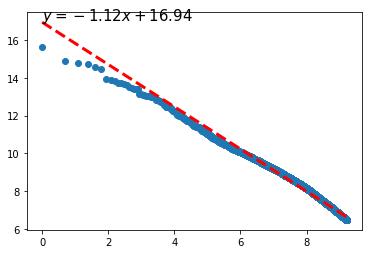

In [7]:
import operator
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def main():
    words = read_data()
    words = sorted(words, key=lambda x: x[1], reverse=True) # words.txt 단어를 빈도수 순으로 정렬합니다.
    
    # 정수로 표현된 단어를 X축 리스트에, 각 단어의 빈도수를 Y축 리스트에 저장합니다.  
    X = list(range(1, len(words)+1))
    Y = [x[1] for x in words]
    
    # X, Y 리스트를 array로 변환합니다. 
    X, Y = np.array(X).reshape(-1,1), np.array(Y)
    
    # X, Y의 각 원소 값에 log()를 적용합니다.
    X, Y = np.log(X), np.log(Y)
    
    # 기울기와 절편을 구한 후 그래프와 차트를 출력합니다. 
    slope, intercept = do_linear_regression(X, Y)
    draw_chart(X, Y, slope, intercept)
    
    return slope, intercept


# read_data() - words.txt에 저장된 단어와 해당 단어의 빈도수를 리스트형으로 변환합니다.
def read_data():
    # words.txt 에서 단어들를 읽어, 
    # [[단어1, 빈도수], [단어2, 빈도수] ... ]형으로 변환해 리턴합니다.
    words = []
    f = open('data/words.txt', 'r')
    lines = f.readlines()
    for line in lines:
        word_freq = line.strip().split(',')
        words.append([word_freq[0], int(word_freq[1])])

    return words


# do_linear_regression() - 임포트한 sklearn 패키지의 함수를 이용해 그래프의 기울기와 절편을 구합니다.
def do_linear_regression(X, Y):
    # do_linear_regression() 함수를 작성하세요. 

    lrmodel = LinearRegression()
    lrmodel.fit(X, Y)    
    
    slope = lrmodel.coef_[0]
    intercept = lrmodel.intercept_

    return (slope, intercept)


# draw_chart() - matplotlib을 이용해 차트를 설정합니다.
def draw_chart(X, Y, slope, intercept):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(X, Y)

    # 차트의 X, Y축 범위와 그래프를 설정합니다.
    min_X = min(X)
    max_X = max(X)
    min_Y = min_X * slope + intercept
    max_Y = max_X * slope + intercept
    plt.plot([min_X, max_X], [min_Y, max_Y], 
             color='red',
             linestyle='--',
             linewidth=3.0)
    
    # 기울과와 절편을 이용해 그래프를 차트에 입력합니다.
    ax.text(min_X, min_Y + 0.1, r'$y = %.2lfx + %.2lf$' % (slope, intercept), fontsize=15)

if __name__ == "__main__":
    main()

### 3-1. 확률로 π 계산하기

Estimated pi = 3.140000


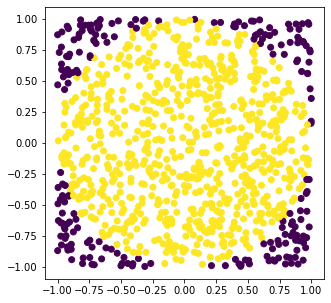

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def main():
    plt.figure(figsize=(5,5))
    
    X = []
    Y = []
    
    # N을 10배씩 증가할 때 파이 값이 어떻게 변경되는지 확인해보세요.
    N = 1000
    
    for i in range(N):
        X.append(np.random.rand() * 2 - 1)
        Y.append(np.random.rand() * 2 - 1)
    X = np.array(X)
    Y = np.array(Y)
    distance_from_zero = np.sqrt(X * X + Y * Y)
    is_inside_circle = distance_from_zero <= 1
    
    print("Estimated pi = %f" % (np.average(is_inside_circle) * 4))
    
    plt.scatter(X, Y, c=is_inside_circle)

if __name__ == "__main__":
    main()

### 3-2. 유방암 검사 키트

In [9]:
def main():
    sensitivity = 0.8 # float(input())
    prior_prob = 0.004 # float(input())
    false_alarm = 0.1 # float(input())

    print("%.2lf%%" % (100 * mammogram_test(sensitivity, prior_prob, false_alarm)))

def mammogram_test(sensitivity, prior_prob, false_alarm):
    p_a1_b1 = sensitivity # p(A = 1 | B = 1)

    p_b1 = prior_prob    # p(B = 1)

    p_b0 = 1 - prior_prob    # p(B = 0)

    p_a1_b0 = false_alarm # p(A = 1|B = 0)

    p_a1 = (p_a1_b0 * p_b0) + (p_a1_b1 * p_b1)    # p(A = 1)

    p_b1_a1 = (p_a1_b1 * p_b1) / p_a1 # p(B = 1|A = 1)

    return p_b1_a1

if __name__ == "__main__":
    main()

3.11%


### 3-3. 사탕 기계

In [10]:
import re
import math
import numpy as np

def main():
    M1 = {'r': 0.7, 'g': 0.2, 'b': 0.1} # M1 기계의 사탕 비율
    M2 = {'r': 0.3, 'g': 0.4, 'b': 0.3} # M2 기계의 사탕 비율
    
    test = {'r': 4, 'g': 3, 'b': 3}

    print(naive_bayes(M1, M2, test, 0.7, 0.3))

def naive_bayes(M1, M2, test, M1_prior, M2_prior):
    p_M1 = ((M1['r'] ** test['r']) * (M1['g'] ** test['g']) * (M1['b'] ** test['b'])) * M1_prior
    p_M2 = ((M2['r'] ** test['r']) * (M2['g'] ** test['g']) * (M2['b'] ** test['b'])) * M1_prior

    normalized_p_M1 = p_M1 / (p_M1 + p_M2)
    normalized_p_M2 = p_M2 / (p_M1 + p_M2)

    return [normalized_p_M1, normalized_p_M2]

if __name__ == "__main__":
    main()

[0.12067145800874506, 0.8793285419912549]


### 3-4. Bag of Words

In [11]:
import re

special_chars_remover = re.compile("[^\w'|_]")

def main():
    sentence = "Bag-of-Words 모델을 Python으로 직접 구현하겠습니다."
    bow = create_BOW(sentence)

    print(bow)


def create_BOW(sentence):
    bow = {}
    sentence = remove_special_characters(sentence.lower())
    word_list = sentence.split(' ')
    
    for word in word_list:
        # bow.setdefault(token, 0)
        if len(word) > 0:
            bow[word] = bow.get(word, 0) + 1
    
    return bow


def remove_special_characters(sentence):
    return special_chars_remover.sub(' ', sentence)


if __name__ == "__main__":
    main()

{'bag': 1, 'of': 1, 'words': 1, '모델을': 1, 'python으로': 1, '직접': 1, '구현하겠습니다': 1}


### 3-5. 네이버 영화평 감정분석

어설픈 연기들로 몰입이 전혀 안되네요


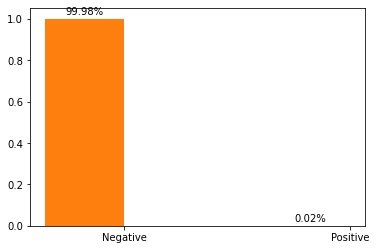

In [12]:
import io
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import re
import math

special_chars_remover = re.compile("[^\w'|_]")
def remove_special_characters(sentence):
    return special_chars_remover.sub(' ', sentence)

def main():
    training_sentences = read_data()
    testing_sentence = "어설픈 연기들로 몰입이 전혀 안되네요"
    prob_pair = naive_bayes(training_sentences, testing_sentence)
    
    plot_title = testing_sentence
    if len(plot_title) > 50: plot_title = plot_title[:50] + "..."
    visualize_boxplot(plot_title,
                  list(prob_pair),
                  ['Negative', 'Positive'])

def naive_bayes(training_sentences, testing_sentence): # math.log(0.5): 긍정 부정 리뷰 개수 같으므로 
    log_prob_negative = calculate_doc_prob(training_sentences[0], testing_sentence, 0.1) + math.log(0.5)
    log_prob_positive = calculate_doc_prob(training_sentences[1], testing_sentence, 0.1) + math.log(0.5)
    prob_pair = normalize_log_prob(log_prob_negative, log_prob_positive)
    
    return prob_pair

def read_data():
    training_sentences = [[], []]
    
    '''
    숙제 1
    여기서 파일을 읽어 training_sentences에 저장합니다.
    '''
    with open("data/ratings.txt", 'r', encoding='utf-8') as file:
        next(file) # 1행(id, document, label) 제거
        for f in file: # 각 리뷰에 대해
            review = f.strip().split('\t') # 맨 뒤 \n 제거
            if review[2] == '0': # 부정 리뷰
                training_sentences[0].append(review[1])
            else: # 긍정 리뷰
                training_sentences[1].append(review[1])
    
    return [' '.join(training_sentences[0]), ' '.join(training_sentences[1])]

def normalize_log_prob(prob1, prob2):
    
    '''
    숙제 4
    로그로 된 확률값을 표준화합니다.
    이 부분은 이미 작성되어 있습니다.
    '''
    
    maxprob = max(prob1, prob2)

    prob1 -= maxprob
    prob2 -= maxprob
    prob1 = math.exp(prob1)
    prob2 = math.exp(prob2)

    normalize_constant = 1.0 / float(prob1 + prob2)
    prob1 *= normalize_constant
    prob2 *= normalize_constant

    return (prob1, prob2)

def calculate_doc_prob(training_sentence, testing_sentence, alpha):
    logprob = 0

    training_model = create_BOW(training_sentence)
    testing_model = create_BOW(testing_sentence)

    '''
    숙제 3
    training_sentence로 만들어진 모델이,
    testing_sentence를 만들어 낼 **로그 확률** 을 구합니다.
    일반 숫자에서 로그값을 만들기 위해서는 math.log() 를 사용합니다.
    
    일반 숫자에서의 곱셈이 로그에서는 덧셈, 나눗셈은 뺄셈이 된다는 점에 유의하세요.
    예) 3 * 5 = 15
        log(3) + log(5) = log(15)
        
        5 / 2 = 2.5
        log(5) - log(2) = log(2.5)
    '''

    total = sum(training_model.values())
    for i in testing_model:
        if i in training_model:
            logprob += math.log(training_model[i] / total)
        else:
            logprob += math.log(0.1 / total)

    return logprob

def create_BOW(sentence):
    bow = {}
    
    '''
    숙제 2
    이전 실습과 동일하게 bag of words를 만듭니다.
    '''

    sentence = remove_special_characters(sentence.lower())
    word_list = sentence.split(' ')

    for word in word_list:
        if len(word) > 0:
            bow[word] = bow.get(word, 0) + 1

    return bow

'''
이 밑의 코드는 시각화를 위한 코드입니다.
궁금하다면 살펴보세요.
'''
def visualize_boxplot(title, values, labels):
    width = .35

    print(title)
    
    fig, ax = plt.subplots()
    ind = numpy.arange(len(values))
    rects = ax.bar(ind, values, width)
    ax.bar(ind, values, width=width)
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(labels)

    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., height + 0.01, '%.2lf%%' % (height * 100), ha='center', va='bottom')

    autolabel(rects)

if __name__ == "__main__":
    main()

### 4-1. PCA 차원축소

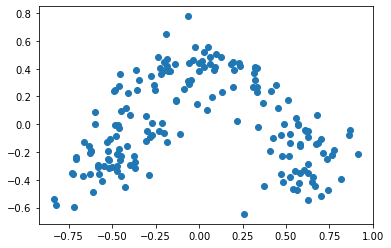

In [13]:
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy as np
import csv

def main():
    X, attributes = input_data()
    pca_array = normalize(X)
    pca, pca_array = run_PCA(X, 2)
    visualize_2d_wine(pca_array)

def input_data():
    X = []
    attributes = []

    csvreader = csv.reader(open('data/wine.csv'))
    for line in csvreader:
        float_numbers = [float(x) for x in line]
        X.append(float_numbers)

    with open('data/attributes.txt') as fp:
        attributes = fp.readlines()
    attributes = [x.strip() for x in attributes]

    return np.array(X), attributes

def run_PCA(X, num_components):
    pca = sklearn.decomposition.PCA(num_components) # 몇개로 차원 축소 할 것인가
    pca.fit(X)
    pca_array = pca.transform(X)
    return pca, pca_array
    
def normalize(X):
    '''
    각각의 feature에 대해,
    178개의 데이터에 나타나는 해당하는 feature의 값이 최소 0, 최대 1이 되도록
    선형적으로 데이터를 이동시킵니다.
    '''
    for i in range(X.shape[1]): # 13개의 차원에 대해서
        X[:, i] = X[:, i] - np.min(X[:, i])
        X[:, i] = X[:, i] / np.max(X[:, i])
    return X

def visualize_2d_wine(X):
    '''X를 시각화하는 코드를 구현합니다.'''
    plt.scatter(X[:, 0], X[:, 1])

if __name__ == '__main__':
    main()

### 4-2. K-Means 클러스터링

[[-0.68388966 -0.37373167]
 [ 0.098774    0.17226483]
 [-0.04523645 -0.32815231]]
[[-0.55918612 -0.24859536]
 [ 0.15210429  0.22072586]
 [ 0.29720736 -0.3136785 ]]
[[-0.49459312 -0.17365971]
 [ 0.04101307  0.34262542]
 [ 0.60306452 -0.23956367]]
[[-0.48503975 -0.17742871]
 [ 0.01701227  0.36612572]
 [ 0.59750634 -0.21895939]]
[[-0.48503975 -0.17742871]
 [ 0.01701227  0.36612572]
 [ 0.59750634 -0.21895939]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


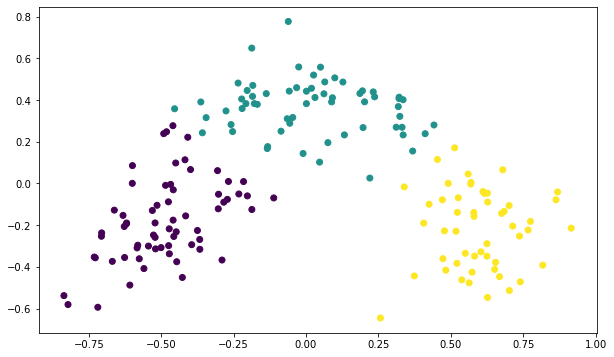

In [14]:
import sklearn.decomposition
import sklearn.cluster
import matplotlib.pyplot as plt
import numpy as np

def main():
    X, attributes = input_data()
    X = normalize(X)
    pca, pca_array = run_PCA(X, 2)
    labels = kmeans(pca_array, 3, [0, 1, 2]) # K-Means는 시작점에 민감하게 반응함
    print(labels)
    visualize_2d_wine(pca_array, labels)

def input_data():
    X = []
    attributes = []
    
    with open('data/wine.csv') as fp:
        for line in fp:
            X.append([float(x) for x in line.strip().split(',')])
    
    with open('data/attributes.txt') as fp:
        attributes = [x.strip() for x in fp.readlines()]

    return np.array(X), attributes

def run_PCA(X, num_components):
    pca = sklearn.decomposition.PCA(n_components=num_components)
    pca.fit(X)
    pca_array = pca.transform(X)

    return pca, pca_array

def kmeans(X, num_clusters, initial_centroid_indices):
    import time
    
    N = len(X)
    centroids = X[initial_centroid_indices]
    labels = np.zeros(N)
    
    while True:
        '''
        Step 1. 각 데이터 포인트 i 에 대해 가장 가까운
        중심점을 찾고, 그 중심점에 해당하는 클러스터를 할당하여
        labels[i]에 넣습니다.
        가까운 중심점을 찾을 때는, 유클리드 거리를 사용합니다.
        미리 정의된 distance 함수를 사용합니다.
        '''
        is_changed = False

        for i in range(N):
            distances = [] # X 각각에 대해 중심점과의 거리
            for k in range(num_clusters):
                k_dist = distance(X[i], centroids[k])
                distances.append(k_dist)
            if labels[i] != np.argmin(distances):
                is_changed = True
            labels[i] = np.argmin(distances)
                
        '''
        Step 2. 할당된 클러스터를 기반으로 새로운 중심점을 계산합니다.
        중심점은 클러스터 내 데이터 포인트들의 위치의 *산술 평균*
        으로 합니다.
        '''

        for k in range(num_clusters):
            x = X[labels == k][:, 0]
            y = X[labels == k][:, 1]

            x = np.mean(x)
            y = np.mean(y)
            centroids[k] = [x, y]
        print(centroids)
        
        '''
        Step 3. 만약 클러스터의 할당이 바뀌지 않았다면 알고리즘을 끝냅니다.
        아니라면 다시 반복합니다.
        '''
        if not is_changed:
            break
    return labels

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
    
def normalize(X):
    for dim in range(len(X[0])):
        X[:, dim] -= np.min(X[:, dim])
        X[:, dim] /= np.max(X[:, dim])
    return X

'''
이전에 더해, 각각의 데이터 포인트에 색을 입히는 과정도 진행합니다.
'''

def visualize_2d_wine(X, labels):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels)

if __name__ == '__main__':
    main()